## Assignment 1 - 220197E (Gunathilaka K L)


### Q1 

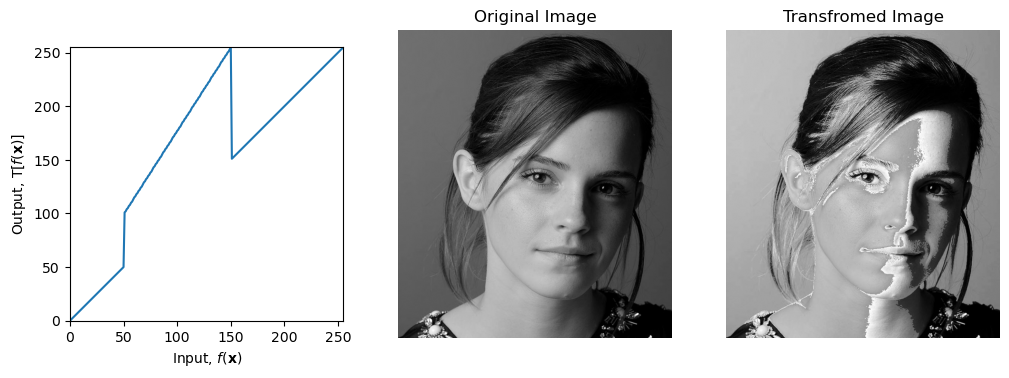

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0), (50, 50), (50, 101), (150, 255), (150, 151), (255, 255)])

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

#print(transform)
f = cv.imread("a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
g = cv.LUT(f, transform)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$');
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(g, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Transfromed Image'); 
ax[2].axis("off")
plt.show()

### Q2 i

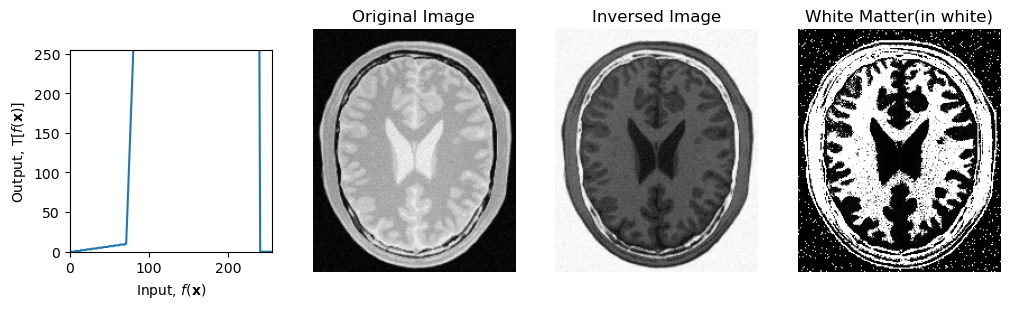

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0), (70,10), (80,255) , (238, 255),(239, 0) ,(255,0)])
inverse = np.arange(255, -1, -1, dtype=np.uint8)

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

f = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
inv = cv.LUT(f, inverse)
g = cv.LUT(inv, transform)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(inv, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Inversed Image'); #so white is lighter 
ax[2].axis("off")
ax[3].imshow(g, cmap='gray', vmin=0, vmax=255);ax[3].set_title('White Matter(in white)')
ax[3].axis("off")
plt.show()

### Q2 ii)

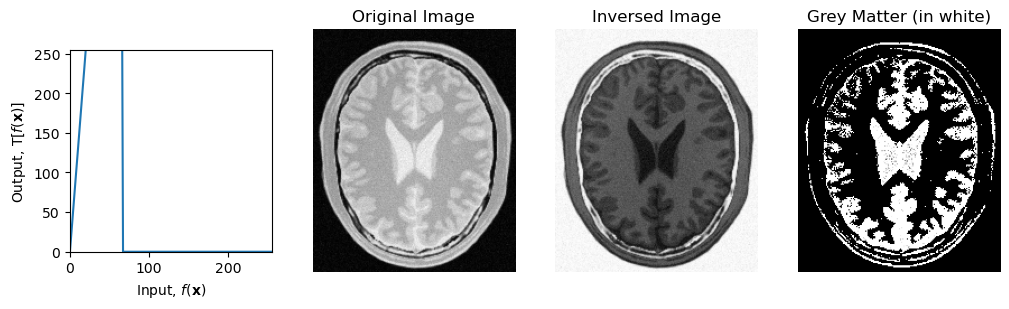

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0),(20, 255) ,  (65,255), (66,0) ,(255,0)])
inverse = np.arange(255, -1, -1, dtype=np.uint8)

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

f = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
inv = cv.LUT(f, inverse)
g = cv.LUT(inv, transform)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(inv, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Inversed Image'); #so white is lighter 
ax[2].axis("off")
ax[3].imshow(g, cmap='gray', vmin=0, vmax=255);ax[3].set_title('Grey Matter (in white)')
ax[3].axis("off")
plt.show()

### Q3 

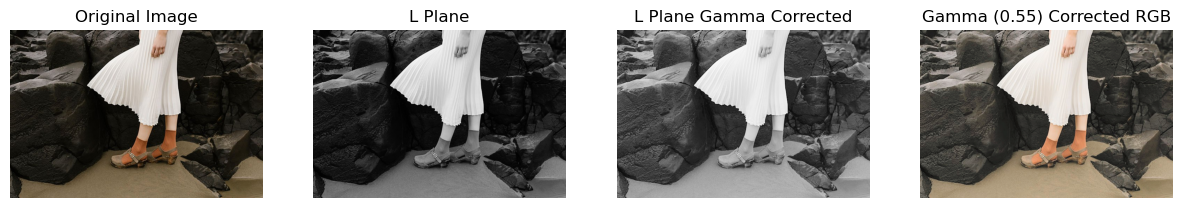

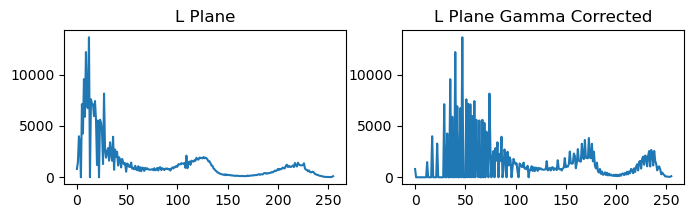

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.55

bgr = cv.imread('a1images/highlights_and_shadows.jpg')
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
lab = cv.cvtColor(rgb, cv.COLOR_RGB2LAB)
lplane = lab[:, :, 0]

t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(lplane, t)

fig, ax = plt.subplots(1, 4, figsize=(15, 8))
ax[0].imshow(rgb)
ax[0].set_title('Original Image')
ax[1].imshow(lplane, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('L Plane')
hist1 = cv.calcHist([lab], [0], None, [256], [0, 256])

ax[2].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('L Plane Gamma Corrected')

lab[:, :, 0] = g #Assign back to the original array
ax[3].imshow(cv.cvtColor(lab, cv.COLOR_LAB2RGB))
ax[3].set_title('Gamma ({}) Corrected RGB'.format(gamma))
hist2 = cv.calcHist([lab], [0], None, [256], [0, 256]) #after Correction
for a in ax:
    a.axis('off')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(8, 2))
ax[0].plot(hist1)
ax[0].set_title('L Plane')
ax[1].plot(hist2)
ax[1].set_title('L Plane Gamma Corrected')
plt.show()


### Q4

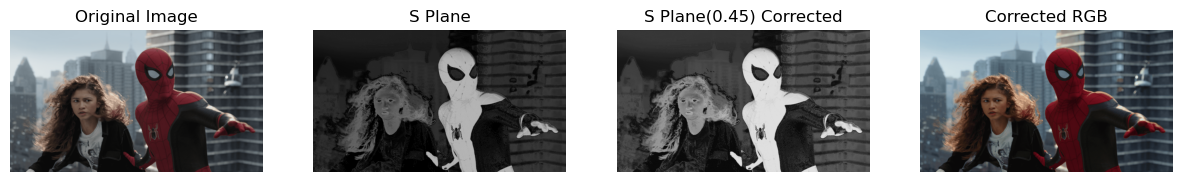

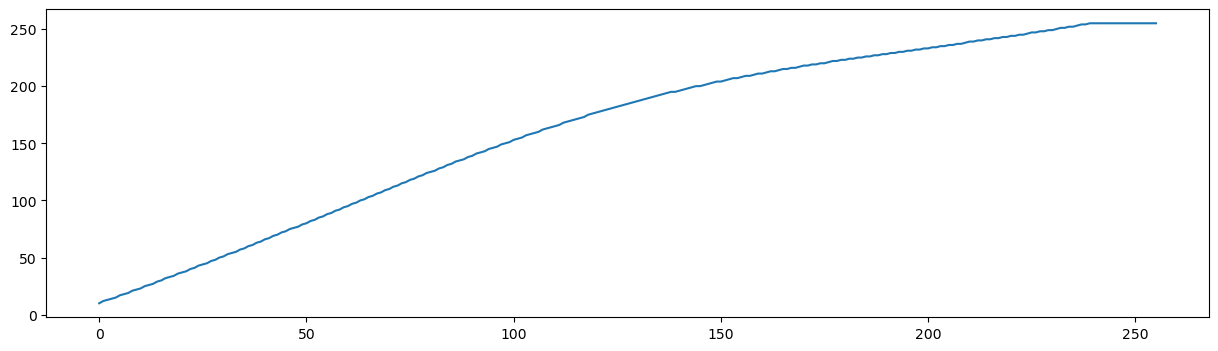

In [102]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

a= 0.45
theta = 70

bgr = cv.imread('a1images/spider.png')
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
splane = hsv[:, :, 1]

f = np.array([np.minimum((i + a*128*np.exp((-1/2)*np.square((i - 128)/ theta))), 255) for i in np.arange(0,256)]).astype(np.uint8)
g2 = cv.LUT(splane, f)

fig, ax = plt.subplots(1, 4, figsize=(15, 8))
ax[0].imshow(rgb)
ax[0].set_title('Original Image')
ax[1].imshow(splane, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('S Plane')

ax[2].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('S Plane({}) Corrected'.format(a))

hsv[:, :, 1] = g2 #Assign back to the original array
ax[3].imshow(cv.cvtColor(hsv, cv.COLOR_HSV2RGB))
ax[3].set_title('Corrected RGB')

for a in ax:
    a.axis('off')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(f)

### Q5

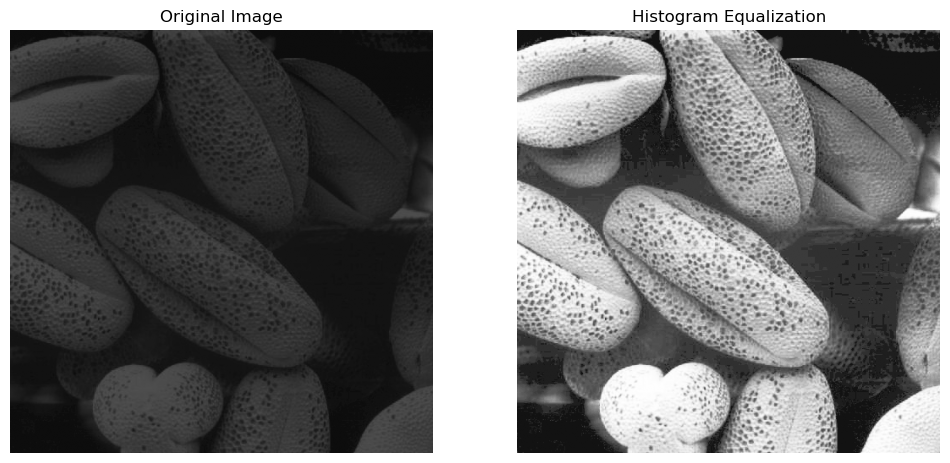

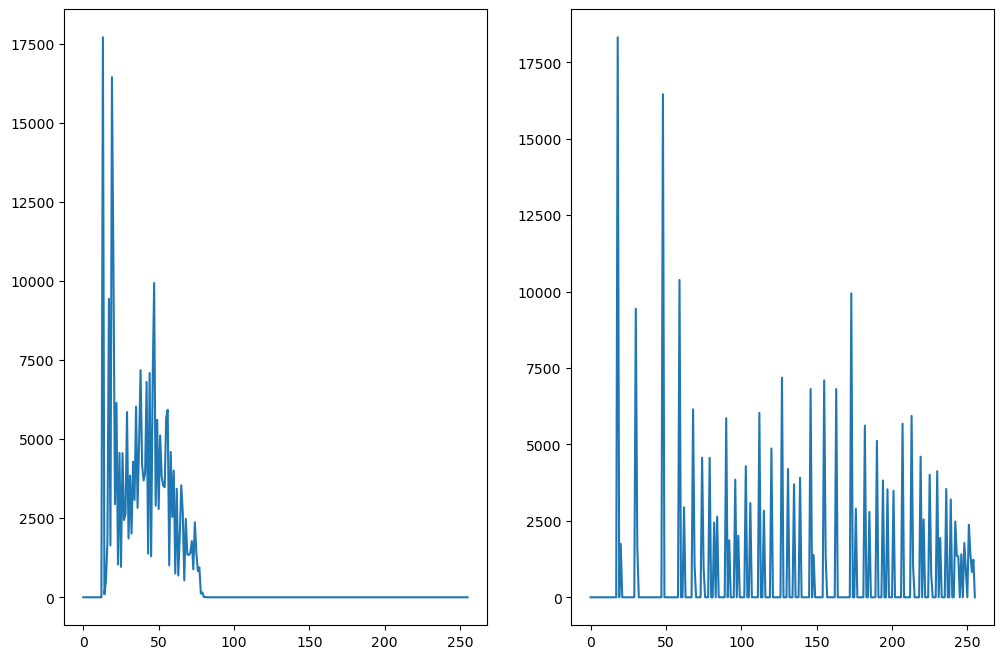

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

M, N = f.shape
L = 256

t = np.zeros(L, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), L, [0, L])
cdf = hist.cumsum()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(L)], dtype=np.uint8)
g = t[f]
hist2, bins = np.histogram(g.ravel(), L, [0, L])

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(hist)
ax[1].plot(hist2)
plt.show()

### Q6

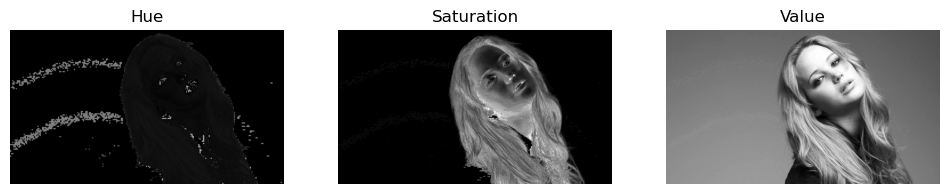

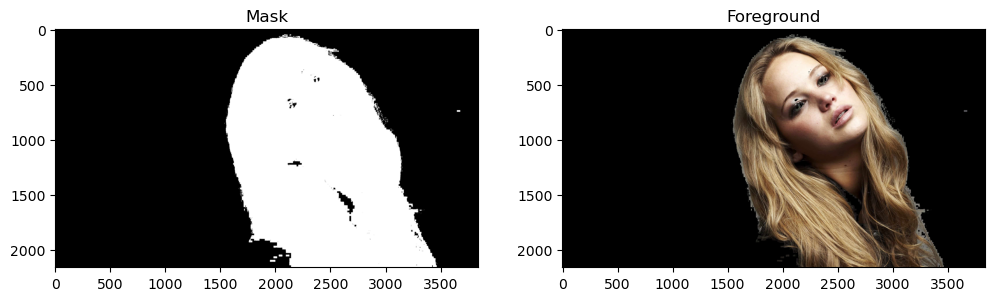

In [122]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bgr = cv.imread('a1images/jeniffer.jpg')
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[1].imshow(s, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[2].imshow(v, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
for a in ax:
    a.axis("off")
plt.show()

# maskTop = cv.inRange(v, 160, 255) #for face and hair
# maskBottom = cv.inRange(v, 0, 20) #for shirt
# final_mask = cv.bitwise_or(maskTop, maskBottom)

final_mask = cv.inRange(s, 12, 255)
foreground = cv.bitwise_and(bgr, bgr, mask=final_mask) #foreground obtained in bgr

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(final_mask, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Mask')
ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB), vmin=0, vmax=255)
ax[1].set_title('Foreground')
plt.show()



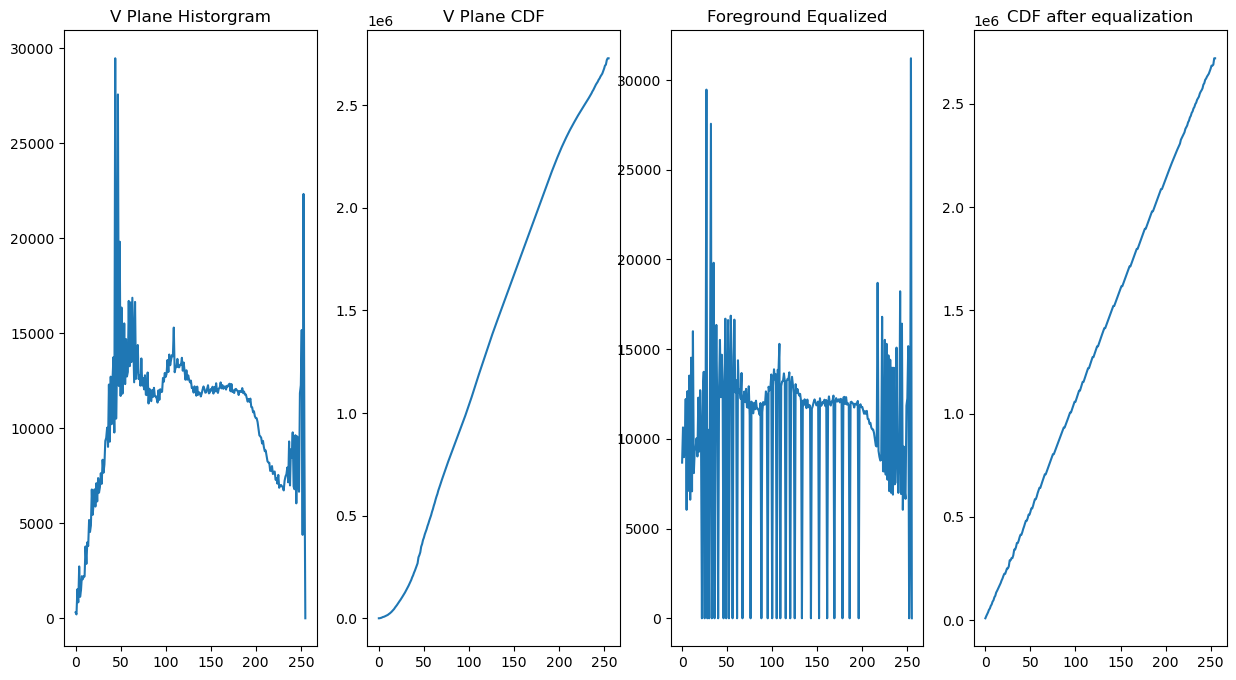

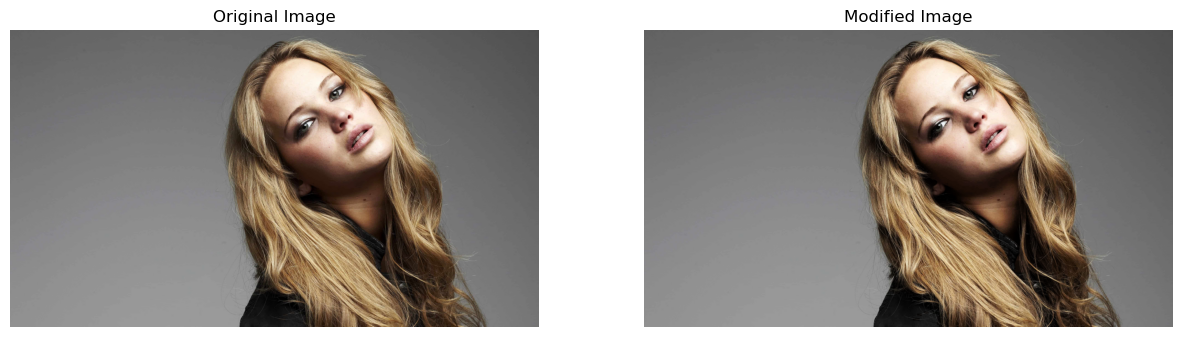

In [138]:
# Equalization of V plane
fig, ax = plt.subplots(1, 4, figsize=(15, 8))
fg_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
fg_vplane = fg_hsv[:, :, 2]
hist, bins = np.histogram(fg_vplane.ravel(), 256, [1, 256])
ax[0].plot(hist)
ax[0].set_title('V Plane Historgram')

cdf = hist.cumsum()
ax[1].plot(cdf)
ax[1].set_title('V Plane CDF')

cdf_min = cdf.min()
num_pixels = (fg_vplane > 0).sum()  #removing large number of 0 intensity pixels


L = 256
t = np.array([((L-1)/num_pixels)*(cdf[i]) for i in range(L)], dtype=np.uint8)
g = t[fg_vplane]

hist2, bins2 = np.histogram(g, L, [1, L])
ax[2].plot(hist2)
ax[2].set_title('Foreground Equalized')

cdf2 = hist2.cumsum()
ax[3].plot(cdf2)
ax[3].set_title('CDF after equalization')
plt.show()

mask_bg = cv.bitwise_not(final_mask)
im_bg = cv.bitwise_and(bgr, bgr, mask=mask_bg)
fg_hsv[:, :, 2] = g

finalImage= cv.add(cv.cvtColor(im_bg, cv.COLOR_BGR2RGB), cv.cvtColor(fg_hsv, cv.COLOR_HSV2RGB))

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(cv.cvtColor(bgr, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(finalImage)
ax[1].set_title('Modified Image')
for a in ax:
    a.axis("off")
plt.show()


### Q7

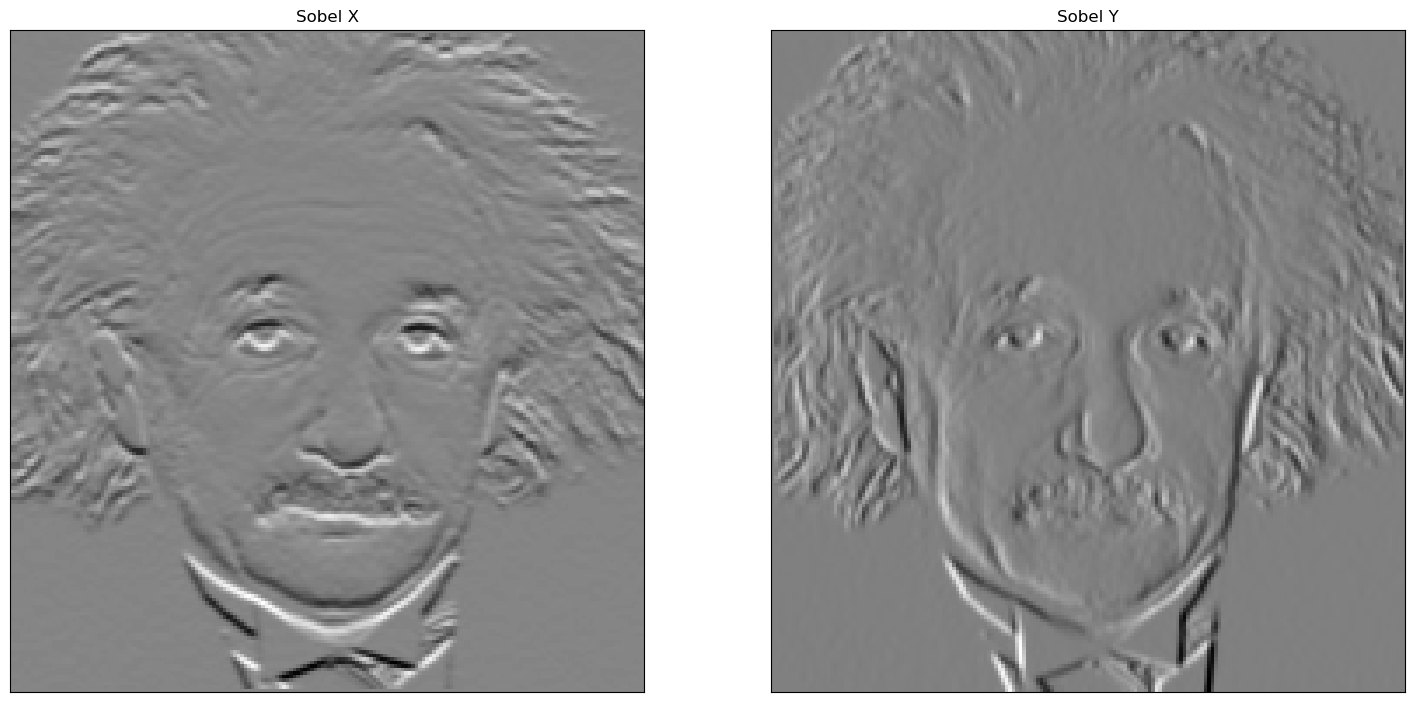

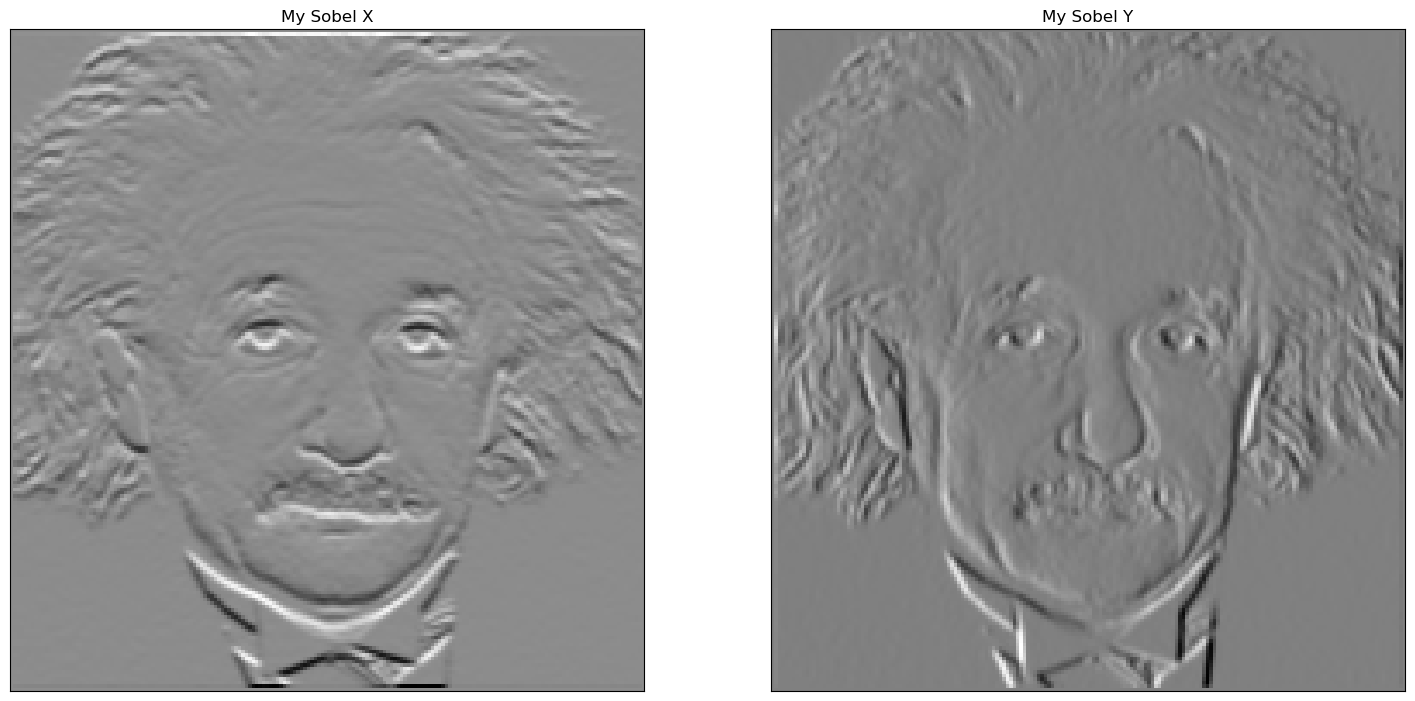

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


#zero padding
im_pad = np.zeros((len(im)+2, len(im[0])+2))
zero_row = np.zeros((1, len(im[0])))
im_temp = np.concatenate([zero_row, im, zero_row], axis=0)# Add row padding first
for i in range(len(im_temp)):
    temp = np.concatenate([np.array([0]), im_temp[i], np.array([0])])# Add column padding
    im_pad[i] = temp 

row, col = im_pad.shape
im_my_x = np.zeros((row, col))
im_my_y = np.zeros((row, col))

for i in range(1, row-1):
    for j in range(1, col-1):
        temp = im_pad[i-1:i+2, j-1:j+2]
        
        im_my_x[i, j] = np.sum(temp * sobel_x)
        im_my_y[i, j] = np.sum(temp * sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_my_x, cmap='gray')
ax[0].set_title('My Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_my_y, cmap='gray')
ax[1].set_title('My Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### Q8

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def zoom(img, method, scale):
    row , col = img.shape
    output = np.zeros((row*scale, col*scale), dtype=img.dtype) #crete final image array

    for i in range(len(img)): # filling the output array with exisiting image pixels
        for j in range(len(img[i])):
            output[(scale+1)*i][(scale+1)*j] = img[i][j]

    if method == 0: #nearest neighbor
        for i in range(row * scale):
            for j in range(col * scale):
                # Check if this position is NOT where we placed an original pixel
                if i % scale != 0 or j % scale != 0:  
                    # Find the nearest original pixel position
                    orig_i = i // scale  # Which original row
                    orig_j = j // scale  # Which original column
                    
                    # Ensure we don't go out of bounds
                    orig_i = min(orig_i, row - 1)
                    orig_j = min(orig_j, col - 1)
                    
                    output[i, j] = img[orig_i, orig_j]

        return output
    
    elif method == 1: #bilinear interpolation
        for i in range(row * scale):
            for j in range(col * scale):
                if i % scale != 0 or j % scale != 0: 
                    orig_i = i / scale # newer inserting pixels mapped back to original image coordinate locations
                    orig_j = j / scale # so right now they are floating points
                    
                    # 4 nearest original pixels
                    i1 = int(np.floor(orig_i))
                    i2 = min(i1 + 1, row - 1)
                    j1 = int(np.floor(orig_j))
                    j2 = min(j1 + 1, col - 1)
                    
                    # Calculate interpolation weights
                    di = orig_i - i1  # Distance from top as a decimal number
                    dj = orig_j - j1  # Distance from left as a decimal number
                    
                    # Normalized bilinear interpolation formula from the slides
                    # f(x,y) = f(0,0)(1-x)(1-y) + f(1,0)x(1-y) + f(0,1)(1-x)y + f(1,1)xy
                    value = (img[i1, j1] * (1 - di) * (1 - dj) +    # Top-left (A)
                            img[i2, j1] * di * (1 - dj) +           # Bottom-left(C)
                            img[i1, j2] * (1 - di) * dj +           # Top-right (B)
                            img[i2, j2] * di * dj)                  # Bottom-right (D)
                     
                    output[i, j] = int(value)
        return output
    else:
        return -1
    
bgr = cv.imread('a1images/images/im01small.png')
zoomed = zoom(bgr, 0, 4)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(cv.cvtColor(bgr, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title('Zoomed Image')
for a in ax:
    a.axis("off")
plt.show()
